In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import csv
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('emprendimientos.csv')
df.head()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.20,136897.80,471784.10,New York,192261.83,Energy,227095.722346,289,Series A,608681.90
1,1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
2,2,153441.51,101145.55,407934.54,Florida,191050.39,Finance,222717.429984,407,Series C,509080.09
3,3,144372.41,118671.85,383199.62,New York,182901.99,Finance,214017.365199,383,Series A,501871.47
4,4,142107.34,91391.77,366168.42,Florida,166187.94,Finance,196476.965990,351,Series B,457560.19


In [3]:
df.tail()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
65,65,134093.502036,47327.344651,26681.272559,California,105423.930052,Tech,120378.804381,335,Seed,74008.617209
66,66,83460.960473,102975.139152,287058.802746,New York,-21313.506762,Healthcare,-14885.847169,430,Seed,390033.941898
67,67,111737.965689,125193.850785,73364.287453,New York,187372.314677,Finance,197551.192890,367,Seed,198558.138238
68,68,28077.387719,2743.241602,294652.768452,New York,62478.033370,Healthcare,64877.719983,258,Seed,297396.010053
69,69,39620.297817,112521.647242,349879.180010,Florida,94597.403597,Healthcare,98661.735576,31,Seed,462400.827252


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             70 non-null     int64  
 1   RnD_Expenditure        70 non-null     float64
 2   Admin_Costs            70 non-null     float64
 3   Marketing_Expenditure  70 non-null     float64
 4   Location               70 non-null     object 
 5   Net_Profit             70 non-null     float64
 6   Industry_Sector        70 non-null     object 
 7   Profit                 70 non-null     float64
 8   Employee_Count         70 non-null     int64  
 9   Investment_Round       70 non-null     object 
 10  Operational_Cost       70 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 6.1+ KB


In [5]:
df.describe()

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,34.500000,73645.768116,110300.346605,212932.971333,108074.578648,120746.497961,264.500000,323233.317938
std,20.351085,46643.653676,39611.402919,129284.203274,49144.596277,55478.853960,141.087983,135322.611919
min,0.000000,0.000000,2743.241602,0.000000,-21313.506762,-14885.847169,10.000000,24435.504010
25%,17.250000,37578.659207,96962.557500,120540.355000,78931.372500,83428.580072,144.750000,219525.129324
50%,34.500000,73051.080000,118608.950000,212716.240000,106661.195882,119810.725266,262.000000,322937.665000
75%,51.750000,106300.780101,136547.117500,302423.767500,140623.042127,160098.271102,393.000000,413510.677500
max,69.000000,175623.487278,182645.560000,494430.544453,192261.830000,227095.722346,497.000000,614542.229755


In [6]:
df.isna().sum()

Unnamed: 0               0
RnD_Expenditure          0
Admin_Costs              0
Marketing_Expenditure    0
Location                 0
Net_Profit               0
Industry_Sector          0
Profit                   0
Employee_Count           0
Investment_Round         0
Operational_Cost         0
dtype: int64

In [7]:
df.value_counts('Industry_Sector')

Industry_Sector
Tech          18
Healthcare    17
Finance       13
Energy        11
Retail        11
dtype: int64

In [8]:
df.value_counts('Location')

Location
California    25
New York      25
Florida       20
dtype: int64

In [9]:
df.value_counts('Investment_Round')

Investment_Round
Seed        37
Series C    13
Series B     9
IPO          6
Series A     5
dtype: int64

Text(0.5, 0, '')

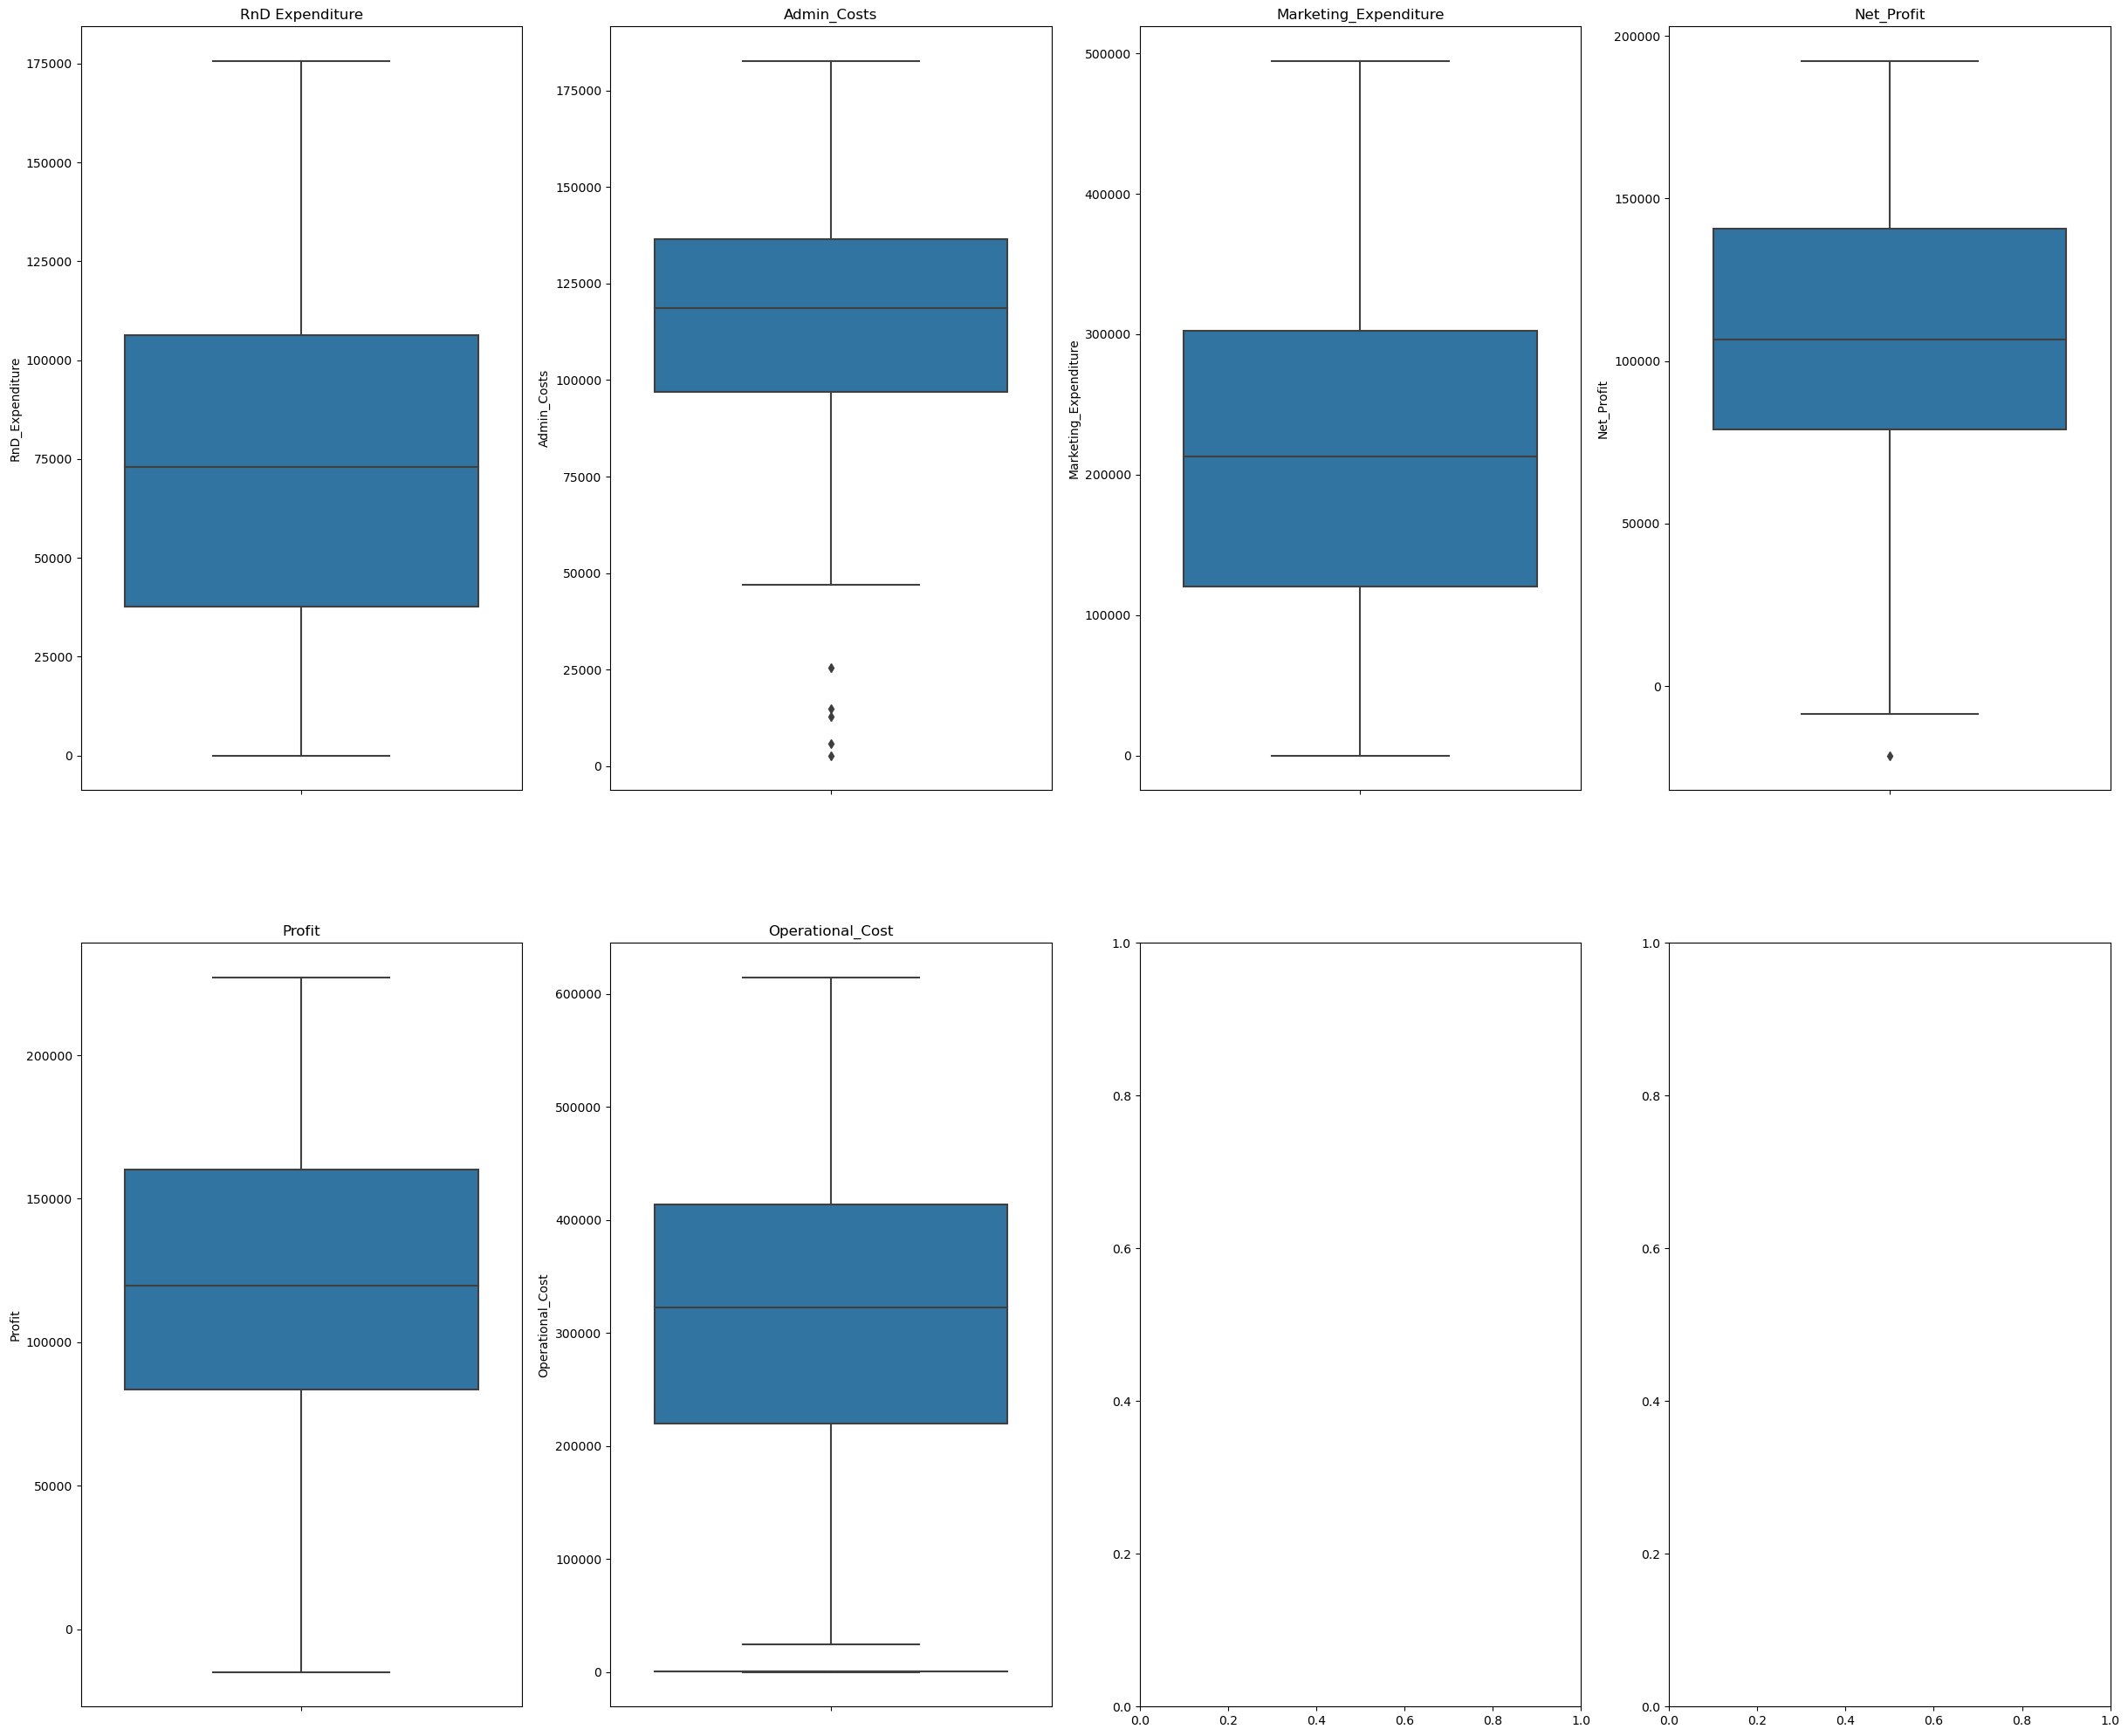

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(30, 25))

sns.boxplot(y='RnD_Expenditure',data=df, ax=axes[0, 0])
axes[0, 0].set_title('RnD Expenditure')
axes[0, 0].set_xlabel('')
sns.boxplot(y='Admin_Costs',data=df, ax=axes[0, 1])
axes[0, 1].set_title('Admin_Costs')
axes[0, 1].set_xlabel('')
sns.boxplot(y='Marketing_Expenditure',data=df, ax=axes[0, 2])
axes[0, 2].set_title('Marketing_Expenditure')
axes[0, 2].set_xlabel('')
sns.boxplot(y='Net_Profit',data=df, ax=axes[0, 3])
axes[0, 3].set_title('Net_Profit')
axes[0, 3].set_xlabel('')
sns.boxplot(y='Profit',data=df, ax=axes[1, 0])
axes[1, 0].set_title('Profit')
axes[1, 0].set_xlabel('')
sns.boxplot(y='Employee_Count',data=df, ax=axes[1, 1])
axes[1, 1].set_title('Employee_Count')
axes[1, 1].set_xlabel('')
sns.boxplot(y='Operational_Cost',data=df, ax=axes[1, 1])
axes[1, 1].set_title('Operational_Cost')
axes[1, 1].set_xlabel('')


In [11]:
#No se observan outliers muy grandes, sin embargo, hay algunos valores extremos en costos administrativos y en el net profit, así que profundizaré en ambos

In [12]:
df[df['Admin_Costs'] < 50000]

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
52,52,22.874963,47013.626724,140221.996032,California,181877.145099,Tech,180909.147951,222,Seed,187235.622756
56,56,37252.042276,12756.631705,454297.751547,California,170826.522801,Tech,172668.226306,215,Seed,467054.383252
57,57,69112.145409,5858.217485,146807.074187,California,105918.051764,Healthcare,114437.223424,194,Seed,152665.291672
58,58,79353.494846,25474.562935,143887.669293,Florida,137735.608507,Retail,146816.260414,453,Seed,169362.232228
60,60,83838.902881,14752.025075,9683.478935,California,17481.972941,Energy,26885.266798,34,Seed,24435.504010
65,65,134093.502036,47327.344651,26681.272559,California,105423.930052,Tech,120378.804381,335,Seed,74008.617209
68,68,28077.387719,2743.241602,294652.768452,New York,62478.033370,Healthcare,64877.719983,258,Seed,297396.010053


In [13]:
#No parece haber ninguna fila anormal acá, simplemente empresas más pequeñas (se obserava que el num de empleados está en la mayoría por debajo del promedio)

In [14]:
df[df['Net_Profit'] == df['Net_Profit'].min()]

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
66,66,83460.960473,102975.139152,287058.802746,New York,-21313.506762,Healthcare,-14885.847169,430,Seed,390033.941898


In [15]:
#Tampoco parece ser una fila con errores, simplemente una empresa con pérdidas. Se puede deber a que es una empresa del sector healthcare y su gasto en R&d es alto (más alto que el promedio)

C:\Users\josik\AppData\Local\Temp\ipykernel_3760\208858094.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<Axes: >

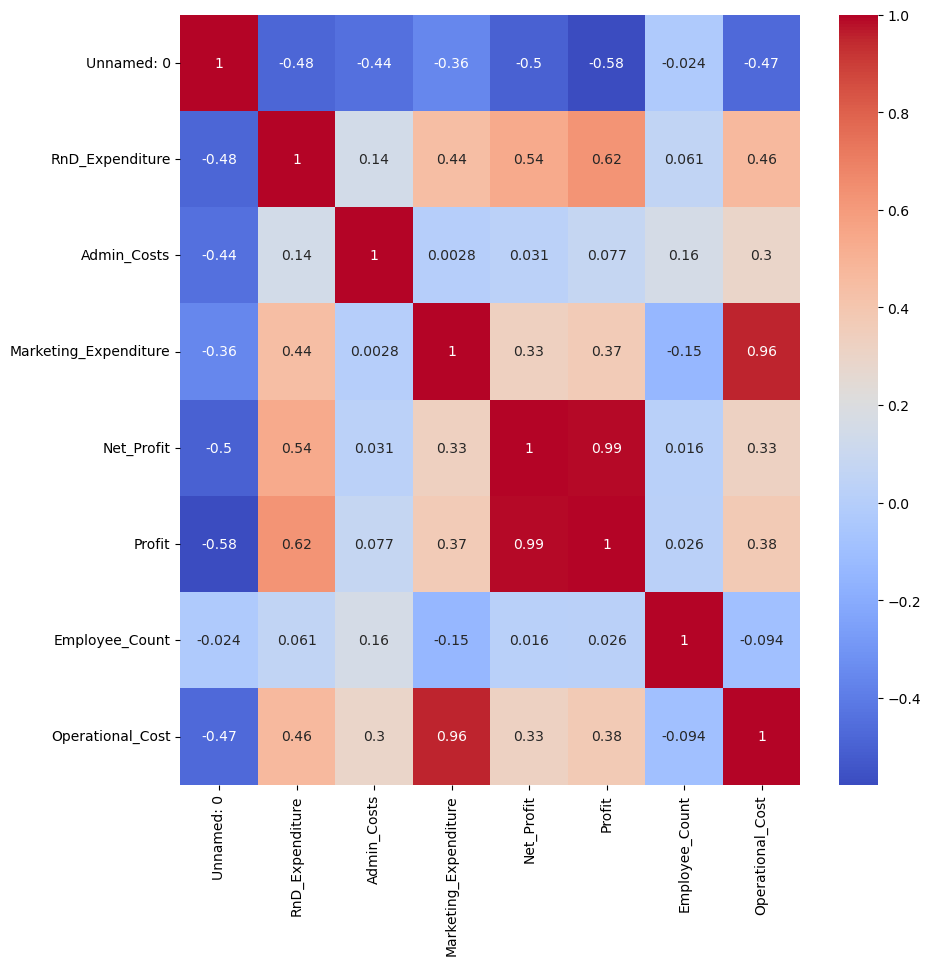

In [16]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    df.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

In [17]:
#La correlación relevante más alta que se observa es entre gastos de R&D y Net profit (0.62)

In [18]:
#Ahora voy a generar un modelo de regresión lineal para intentar predecir la variable Net Profit 

In [19]:
features = ['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure', 'Employee_Count', 'Operational_Cost']

In [20]:
formula = "Net_Profit ~ " + ' + '.join(features)

In [21]:
modelo = smf.ols(formula, data = df)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     6.985
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           9.67e-05
Time:                        19:57:47   Log-Likelihood:                -842.48
No. Observations:                  70   AIC:                             1695.
Df Residuals:                      65   BIC:                             1706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.535e+04   1.94e+04      3.369      0.001    2.66e+04    1.04e+05
RnD_Expenditure           0.5156      0.124      4.149      0.000       0.267       0.764
Admin_Costs              -0.0497      0.088     -0.562      0.576      -0.226       0.127
Marketing_Expenditure     0.0473      0.052      0.909      0.367      -0.057       0.151
Employee_Count            3.4692     37.252      0.093      0.926     -70.929      77.868
Operational_Cost         -0.0023      0.047     -0.050      0.960      -0.096       0.091
==============================================================================
Omnibus:                       29.441   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.449
Skew:                          -1.322   Prob(JB):                     1.85e-16
Kurtosis:                       7.225   Cond. No.                     1.90e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.85e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
#COEFICIENTES:
#El más alto es el de Employee count. Esto significa que por cada empleado que aumente, el net profit va a aumentar 3,47 (manteniendo el resto de las var constantes). Sin embargo, el pvalue es muy alto, por ende no es un coef significativo estadisticamente.
#El seguno más alto es el de gasto de R&D. Esto es coherente con el gráfico de correlaciones. Por cada peso que aumente R&D se espera que aumente 0.52 el net profit (manteniendo el resto de las variables constantes). El pavlue es 0, así que se considera valido.
#El resto no tienen coeficientes muy altos y esto hace que no afecten mucho a la variable Net Profit. Además, los Pvalues son altos, lo que los convierte en no significativos. 
#El R2 del modelo es 0.3, lo cual es muy bajo también

In [26]:
df['predicciones'] = modelo.predict(df)
df[['predicciones', 'Net_Profit']]

,predicciones,Net_Profit
0,165699.281332,192261.830000
1,162023.541724,191792.060000
2,158957.348038,191050.390000
3,152174.012726,182901.990000
4,151548.243684,166187.940000
...,...,...
65,134385.359215,105423.930052
66,117424.088513,-21313.506762
67,121018.934298,187372.314677
68,93827.102239,62478.033370


In [28]:
df['desvio'] = df['Net_Profit'] - df['predicciones']
df[[ 'Net_Profit', 'predicciones', 'desvio']]

,Net_Profit,predicciones,desvio
0,192261.830000,165699.281332,26562.548668
1,191792.060000,162023.541724,29768.518276
2,191050.390000,158957.348038,32093.041962
3,182901.990000,152174.012726,30727.977274
4,166187.940000,151548.243684,14639.696316
...,...,...,...
65,105423.930052,134385.359215,-28961.429163
66,-21313.506762,117424.088513,-138737.595275
67,187372.314677,121018.934298,66353.380379
68,62478.033370,93827.102239,-31349.068869


In [30]:
#Error promedio:
format(df['desvio'].mean(), '.15f')

'0.000000000040745'

In [ ]:
#Tiende a 0, así que es correcto

In [31]:
#Error al cuadrado:
df['error_cuadratico'] = df['desvio'] ** 2
df[[ 'Net_Profit', 'predicciones', 'desvio', 'error_cuadratico']]

,Net_Profit,predicciones,desvio,error_cuadratico
0,192261.830000,165699.281332,26562.548668,7.055690e+08
1,191792.060000,162023.541724,29768.518276,8.861647e+08
2,191050.390000,158957.348038,32093.041962,1.029963e+09
3,182901.990000,152174.012726,30727.977274,9.442086e+08
4,166187.940000,151548.243684,14639.696316,2.143207e+08
...,...,...,...,...
65,105423.930052,134385.359215,-28961.429163,8.387644e+08
66,-21313.506762,117424.088513,-138737.595275,1.924812e+10
67,187372.314677,121018.934298,66353.380379,4.402771e+09
68,62478.033370,93827.102239,-31349.068869,9.827641e+08


In [32]:
#Error cuadrático promedio:
format(df['error_cuadratico'].mean(), '.15f')

'1665028653.020696401596069'

In [46]:
#Análisis del Beneficio neto por industria
industrias = df.groupby('Industry_Sector').agg(net_profit=('Net_Profit', 'sum'), num_empresas =('Industry_Sector', 'count'))
industrias['net_profit_%'] = industrias['net_profit'] / industrias['net_profit'].sum() * 100
industrias['net_profit_prom'] = industrias['net_profit'] / industrias['num_empresas']
industrias

,net_profit,num_empresas,net_profit_%,net_profit_prom
Industry_Sector,,,,
Energy,1.050407e+06,11,13.884678,95491.500844
Finance,1.686325e+06,13,22.290496,129717.322667
Healthcare,1.535783e+06,17,20.300572,90340.178050
Retail,1.136505e+06,11,15.022757,103318.608851
Tech,2.156201e+06,18,28.501497,119788.948734


In [ ]:
#La industria con más net profit es la de tecnología, seguida por finanzas y salud. La enrgética concentra la menor cantidad
#Sin embargo, si calculamos el net profit promedio, el sector más tenable es el financiero, seguido por el tecnológico y el retail. Ahí el de salud es el peor. 

In [50]:
#Análisis del beneficio por serie
series = df.groupby('Investment_Round').agg(net_profit=('Net_Profit', 'sum'), num_series =('Investment_Round', 'count'))
series['net_profit_%'] = series['net_profit'] / series['net_profit'].sum() * 100
series['net_profit_prom'] = series['net_profit'] / series['num_series']
series

,net_profit,num_series,net_profit_%,net_profit_prom
Investment_Round,,,,
IPO,6.135294e+05,6,8.109869,102254.906667
Seed,3.611996e+06,37,47.744760,97621.523929
Series A,6.375873e+05,5,8.427875,127517.466000
Series B,1.193707e+06,9,15.778885,132634.162222
Series C,1.508400e+06,13,19.938611,116030.760769


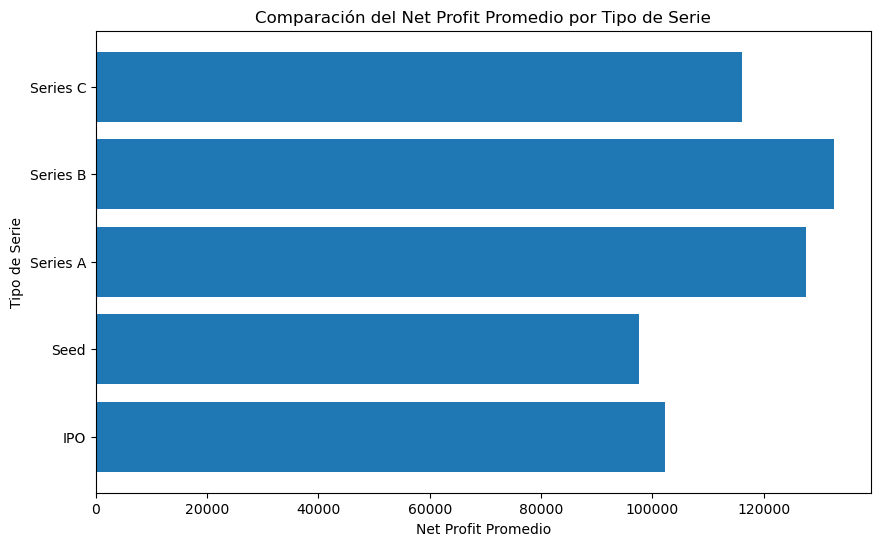

In [56]:
tipos_de_serie = series.index
net_profit_promedio = series['net_profit_prom']

plt.figure(figsize=(10, 6))
plt.barh(tipos_de_serie, net_profit_promedio)
plt.xlabel('Net Profit Promedio')
plt.ylabel('Tipo de Serie')
plt.title('Comparación del Net Profit Promedio por Tipo de Serie')

plt.show()

In [ ]:
#Se observa que el tipo de serie con mayor net profit son las series B, seguidos por la series A.
#Esto es coherente con la teoría, dado que las series A son empresas que tengan grandes ideas y estrategias definidas para llevarlas a la práctica. Al ser empresas con mucho por crecer, el boom del profit al ppio suele ser más exponencial
#Esto se sigue también en las series B, donde se busca hacer explotar a empresas pequeñas que ya tengan funcionamiento.
#Las series C, por otro lado, buscan desarrollar productos o ramas de negocioas más específicas en empresas que ya funcionan y no son necesariamente pequeñas. 